<a href="https://colab.research.google.com/github/patilaakash619/projects-on-machine-learning-and-deep-learing./blob/main/E_Signing_of_Loan_Based_on_Financial_History_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Data Preprocessing.

Data Set Link : https://www.kaggle.com/datasets/aniruddhachoudhury/esigning-of-loan-based-on-financial-history

## Importing Liberies And DataSET.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
dataset = pd.read_csv('/content/financial_data.csv')

## DataExploration.

In [36]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [37]:
dataset.shape

(17908, 21)

Checking The Columns.

In [38]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

check the information about the dataset

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

statistical summary

In [40]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Dealing With The Null Values.

In [41]:
dataset.isnull().values.any()

False

In [42]:
dataset.isnull().values.sum()

0

## Dealing With The Catagorical Columns.

In [195]:
dataset.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [196]:
len(dataset.select_dtypes(include = 'object').columns)

0

In [44]:
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [45]:
dataset['pay_schedule'].nunique()

4

In [46]:
dataset.shape

(17908, 21)

In [47]:
dataset = pd.get_dummies(data = dataset , drop_first=True)

In [48]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [49]:

dataset.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [50]:
len(dataset.select_dtypes(include = 'object').columns)

0

In [52]:
(dataset.e_signed==1).sum()

9639

In [53]:
(dataset.e_signed==0).sum()

8269

## Restructer The Data Set.

In [54]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [55]:
## combine two columns 'personal_account_m' and 'personal_account_y'
dataset['employment months'] = (dataset.months_employed + (dataset.years_employed*12))

In [56]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,employment months
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [59]:
dataset = dataset.drop(columns = ['months_employed','years_employed'])

In [60]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,employment months
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [61]:
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y*12))

In [63]:
## combine two columns 'personal_account_m' and 'personal_account_y'
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,employment months,personal_account_months
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


## Correlation Matrix And Heat Map.

In [64]:
dataset_2 = dataset.drop(columns=['entry_id', 'e_signed'])

<Axes: title={'center': 'Correlation with E Signed'}>

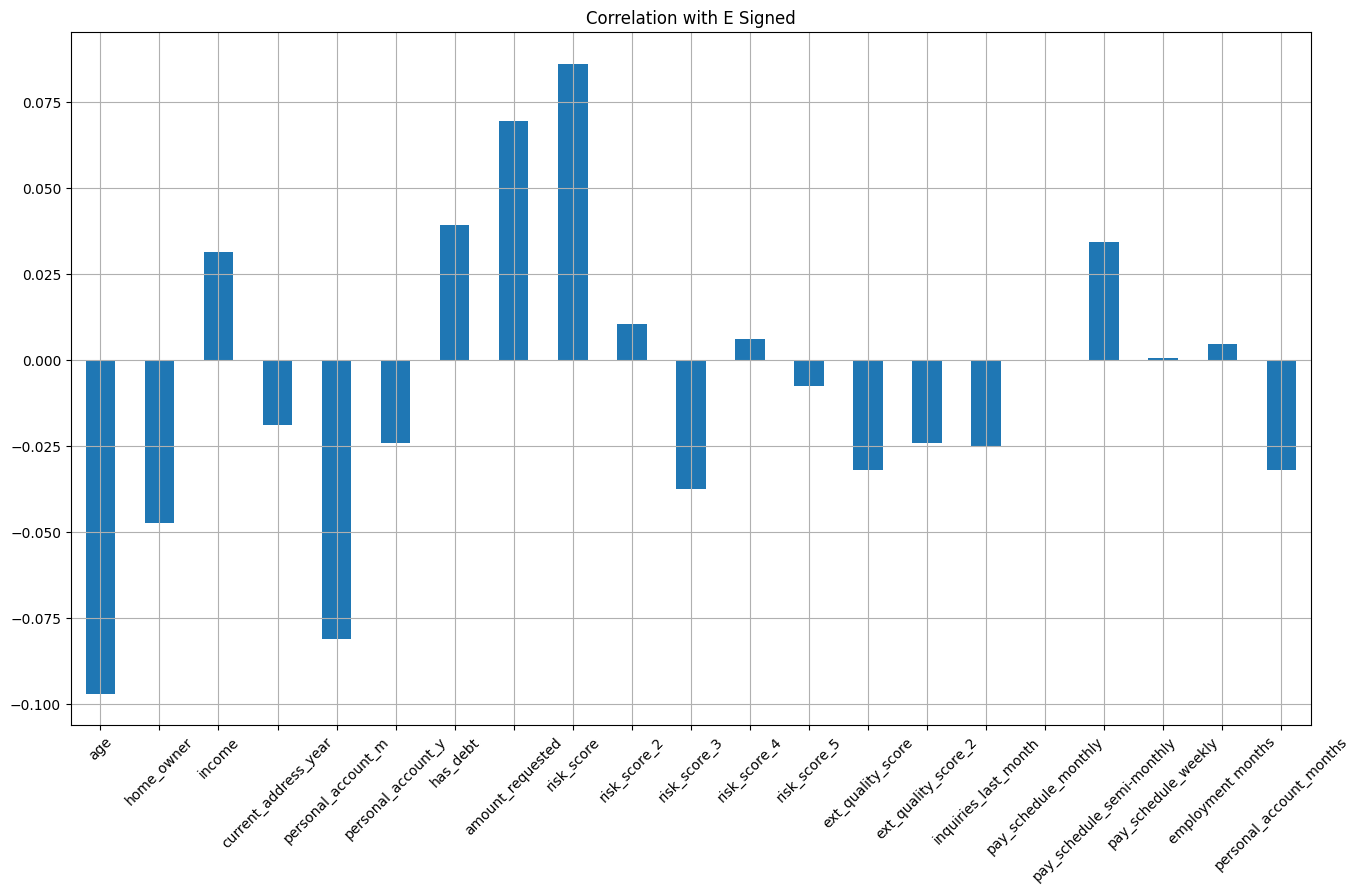

In [65]:
dataset_2.corrwith(dataset['e_signed']).plot.bar(
    figsize=(16,9), title = 'Correlation with E Signed',
    rot = 45, grid = True)

In [66]:
# Create Correlation Matrix
corr = dataset.corr()

In [67]:
corr

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,employment months,personal_account_months
entry_id,1.000000,0.004333,0.002528,-0.009034,-0.001701,-0.000515,-0.007721,0.007476,0.001720,0.006780,...,0.004949,0.006025,0.006392,-0.003492,0.002735,-0.017324,-0.013031,-0.003348,0.000432,-0.007839
age,0.004333,1.000000,0.142046,0.174062,0.146554,-0.013609,0.041332,-0.043808,0.084132,0.162868,...,0.093710,0.032265,0.040019,0.041224,-0.096998,0.141529,0.026439,-0.070750,0.175693,0.040405
home_owner,0.002528,0.142046,1.000000,0.147487,0.179291,0.013782,-0.047105,-0.076206,0.033996,0.113608,...,-0.080470,0.010080,0.005507,0.011215,-0.047409,0.043587,0.004283,-0.025521,0.029342,-0.046213
income,-0.009034,0.174062,0.147487,1.000000,0.046982,0.009052,-0.002002,-0.011199,0.289099,0.168375,...,0.025179,-0.008429,-0.003323,0.051622,0.031377,0.034177,0.065759,-0.025361,0.099071,-0.001157
current_address_year,-0.001701,0.146554,0.179291,0.046982,1.000000,0.082491,0.110258,0.017423,0.067893,0.090535,...,-0.094545,0.003362,0.009093,0.013659,-0.018969,0.011867,0.017395,-0.013041,0.343346,0.119105
personal_account_m,-0.000515,-0.013609,0.013782,0.009052,0.082491,1.000000,-0.140649,0.246832,-0.046148,-0.044146,...,-0.033960,-0.016151,-0.009181,-0.028225,-0.081195,-0.024374,-0.011594,0.004802,-0.034252,-0.046612
personal_account_y,-0.007721,0.041332,-0.047105,-0.002002,0.110258,-0.140649,1.000000,-0.030701,0.051857,0.017071,...,0.042121,0.039808,0.029372,0.003923,-0.024160,0.010126,0.003196,0.000044,0.185546,0.995539
has_debt,0.007476,-0.043808,-0.076206,-0.011199,0.017423,0.246832,-0.030701,1.000000,-0.008445,-0.020332,...,0.002341,-0.021523,-0.009055,-0.001007,0.039192,-0.088523,-0.001747,0.022986,0.005314,-0.007454
amount_requested,0.001720,0.084132,0.033996,0.289099,0.067893,-0.046148,0.051857,-0.008445,1.000000,0.290716,...,0.071470,0.025167,0.028052,-0.036197,0.069572,0.019609,0.066022,-0.015255,0.081987,0.047924
risk_score,0.006780,0.162868,0.113608,0.168375,0.090535,-0.044146,0.017071,-0.020332,0.290716,1.000000,...,0.130464,0.098649,0.108170,-0.261076,0.086098,0.028606,0.026159,-0.038039,0.096245,0.013017


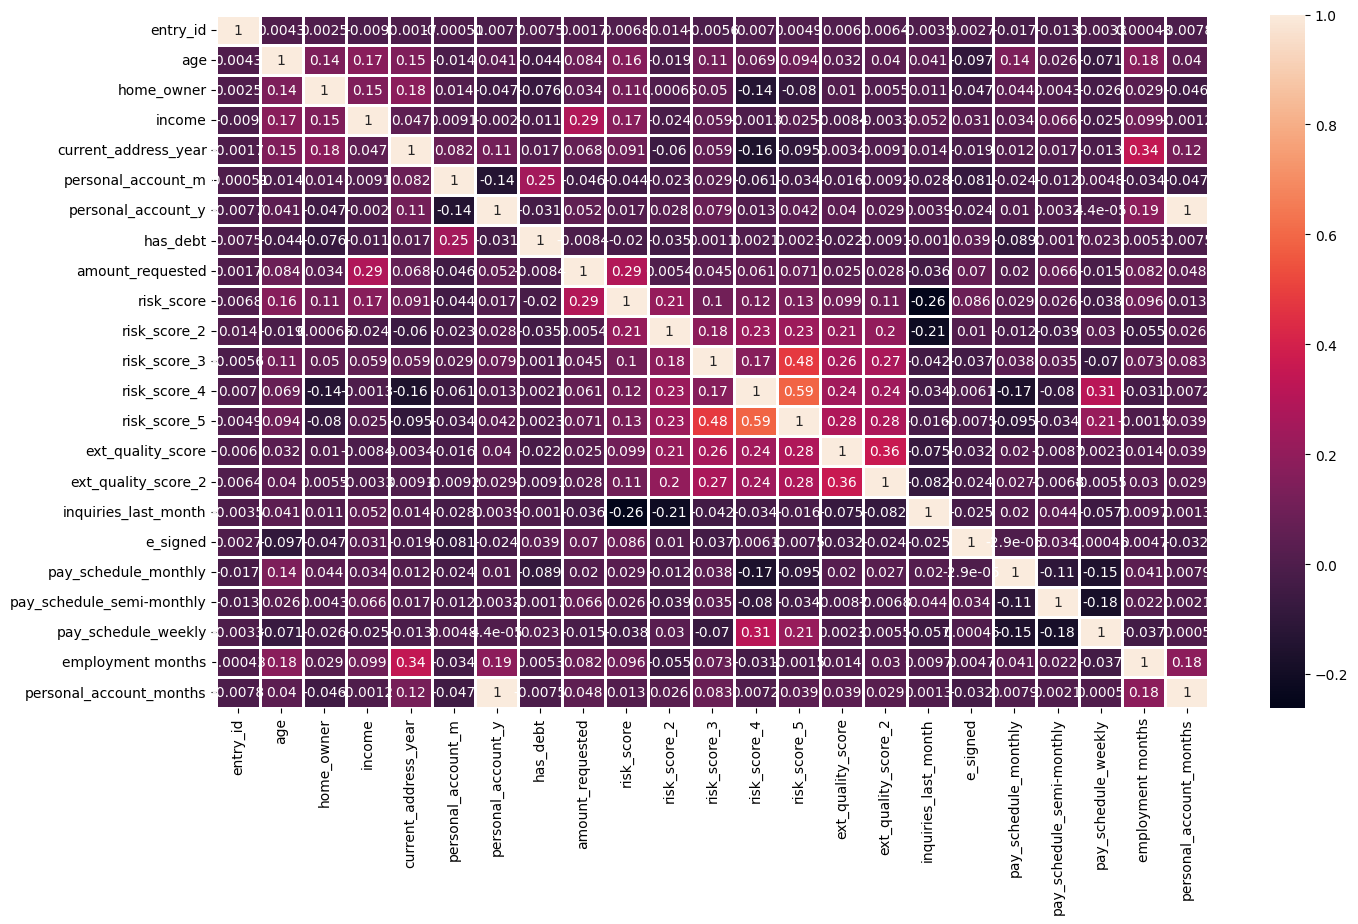

In [69]:
# HEATMAP
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr,annot=True,linewidths=2)

## Splitting The Dataset.

In [70]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,employment months,personal_account_months
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [75]:
x = dataset.drop(columns = ['entry_id','e_signed'] )

In [77]:
y = dataset['e_signed']

In [78]:
x.shape

(17908, 21)

In [79]:
y.shape

(17908,)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [81]:
x_train.shape

(14326, 21)

In [82]:
y_train.shape

(14326,)

In [83]:
x_test.shape

(3582, 21)

In [84]:
y_test.shape

(3582,)

## Feature Scaling.

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
x_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

In [88]:
x_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.50586115,
        -1.18309754, -0.32423091],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.50586115,
        -0.28443207,  0.19566597],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50586115,
         2.86089705, -0.84412778],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.50586115,
         1.06356612,  0.36896493],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.50586115,
         0.61423339,  0.19566597],
       [-0.08997442, -0.85634884, -0.72176785, ...,  1.97682704,
        -0.28443207,  1.75535659]])

# Part 2 : Model Building

## 1.Logistic Regression.

In [125]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [126]:
y_pred = classifier_lr.predict(x_test)

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [128]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [129]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.570352,0.583084,0.707988,0.639494


In [130]:
confusion_matrix(y_test,y_pred)

array([[ 678,  976],
       [ 563, 1365]])

## 2.SVM.

In [131]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state=0)
classifier_svc.fit(x_train,y_train)

SVC(random_state=0)

In [132]:
y_pred = classifier_svc.predict(x_test)

In [133]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-133-a5a1191848a4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [134]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.570352,0.583084,0.707988,0.639494
1,SVM,0.608599,0.621422,0.698133,0.657548


In [135]:
confusion_matrix(y_test,y_pred)

array([[ 834,  820],
       [ 582, 1346]])

## 3.Random Forest.

In [140]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [141]:
y_pred = classifier_rf.predict(x_test)

In [143]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)

<ipython-input-143-ba5ff510051d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [144]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.570352,0.583084,0.707988,0.639494
1,SVM,0.608599,0.621422,0.698133,0.657548
2,Random Forest,0.628420,0.647699,0.678942,0.662953
3,Random Forest,0.628420,0.647699,0.678942,0.662953


In [145]:
confusion_matrix(y_test,y_pred)

array([[ 942,  712],
       [ 619, 1309]])

## 4.XGBoost.

In [146]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [147]:
y_pred = classifier_xgb.predict(x_test)

In [148]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)

<ipython-input-148-82c196e668ac>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [149]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.570352,0.583084,0.707988,0.639494
1,SVM,0.608599,0.621422,0.698133,0.657548
2,Random Forest,0.628420,0.647699,0.678942,0.662953
3,Random Forest,0.628420,0.647699,0.678942,0.662953
4,XGBoost,0.637633,0.655786,0.687759,0.671392


In [150]:
confusion_matrix(y_test,y_pred)

array([[ 958,  696],
       [ 602, 1326]])

# Part 3: Applying Randomized Search to find the best parameters.

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [170]:
parameters ={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3,6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3,0.5 , 0.7]
    }

In [171]:
randomized_search = RandomizedSearchCV(estimator = classifier_xgb, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

In [172]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 6, 8, 10, 12, 15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [173]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [174]:
randomized_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [175]:
randomized_search.best_score_

0.7042737157604025

# Part 4: Final Model (XGBoost).

In [177]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1,monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0)

classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [178]:
y_pred = classifier.predict(x_test)

In [183]:
acc = accuracy_score(y_test, y_pred)
acc

0.6393076493579006